In [1]:
import pickle
with open('ROMS_26yr_COWed_eddies.pkl', 'rb') as file:
    eddies = pickle.load(file)

with open('ROMS_26yr_daydic.pkl', 'rb') as file:
    daydic = pickle.load(file)

# Remove Outliers
import numpy as np
TD_outlier_threshold = 150000 #m
e150 = {
    eddy: eddies[eddy].index[np.where(eddies[eddy]['Tilt Distance'] > TD_outlier_threshold)[0]].tolist()
    for eddy in eddies.keys()
    if any(eddies[eddy]['Tilt Distance'] > TD_outlier_threshold)
}
for eddy in e150:
    eddies[eddy] = eddies[eddy].drop(e150[eddy])



In [2]:
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
import numpy as np

def add_days_to_date(days_to_adds):
    new_dates = []
    for day_to_add in days_to_adds:
        day_to_add = day_to_add + 1462
        input_date = '1990-01-01 00:00:00' # Beginning date of file 1462
        if not isinstance(input_date, datetime):
            input_date = datetime.strptime(input_date, '%Y-%m-%d %H:%M:%S')
        if isinstance(day_to_add, np.ndarray):
            day_to_add = day_to_add.item()
        new_date = input_date + timedelta(days=day_to_add)
        new_dates.append(new_date)
    return new_dates

def extract_numbers_from_list(strings):
    numbers = [int(''.join(filter(str.isdigit, s))) for s in strings if ''.join(filter(str.isdigit, s))]
    return numbers

def date_to_season(dates):
   
    month = dates.month
    if month in [12, 1, 2]:
        return 'Summer'
    elif month in [3, 4, 5]:
        return 'Autumn'
    elif month in [6, 7, 8]:
        return 'Winter'
    elif month in [9, 10, 11]:
        return 'Spring'

def month_to_season(month):
    if month in ['Dec', 'Jan', 'Feb']:
        return 'Summer'
    elif month in ['Mar', 'Apr', 'May']:
        return 'Autumn'
    elif month in ['Jun', 'Jul', 'Aug']:
        return 'Winter'
    elif month in ['Sep', 'Oct', 'Nov']:
        return 'Spring'


distinct_colors_for_each_season = {
    'Summer': 'red',
    'Autumn': 'orange',
    'Winter': 'blue',
    'Spring': 'green'
}

TOTAL_NUM_DAYS = len(daydic)

## Data Analysis

In [3]:
tdir, tdis, elon, elat, evort, date, days = [], [], [], [], [], [], []

for eddy in eddies.keys():

    if len(eddies[eddy]) != 0:

        # if any(eddies[eddy]['Vort'] < 0):
  
        tdis.extend(eddies[eddy]['Tilt Distance'])
        tdir.extend(eddies[eddy]['Tilt Bearing'])
        elon.extend(eddies[eddy]['Lon'])
        elat.extend(eddies[eddy]['Lat'])
        evort.extend(eddies[eddy]['Vort'])

        days_to_add = extract_numbers_from_list(list(eddies[eddy].index))

        date.extend(add_days_to_date(days_to_add)) 

        days.extend(days_to_add)

# TD_threshold = 300000 # checked

# tdir = np.array(tdir)[np.array(tdis)<TD_threshold]
# elon = np.array(elon)[np.array(tdis)<TD_threshold]
# elat = np.array(elat)[np.array(tdis)<TD_threshold]
# evort = np.array(evort)[np.array(tdis)<TD_threshold]
# date = np.array(date)[np.array(tdis)<TD_threshold]
# days = np.array(days)[np.array(tdis)<TD_threshold]
# tdis = np.array(tdis)[np.array(tdis)<TD_threshold]


combined = list(zip(tdis, tdir, elon, elat, evort, date, days))
combined_sorted = sorted(combined, key=lambda x: x[0])
tdis_sorted, tdir_sorted, elon_sorted, elat_sorted, evort_sorted, date_sorted, days_sorted = zip(*combined_sorted)

# Convert back to lists if needed
tdis = list(tdis_sorted)
tdir = list(tdir_sorted)
elon = list(elon_sorted)
elat = list(elat_sorted)
evort = list(evort_sorted)
date = list(date_sorted)
days = list(days_sorted)

months = [d.strftime("%b") for d in date]
seasons = [month_to_season(m) for m in months]



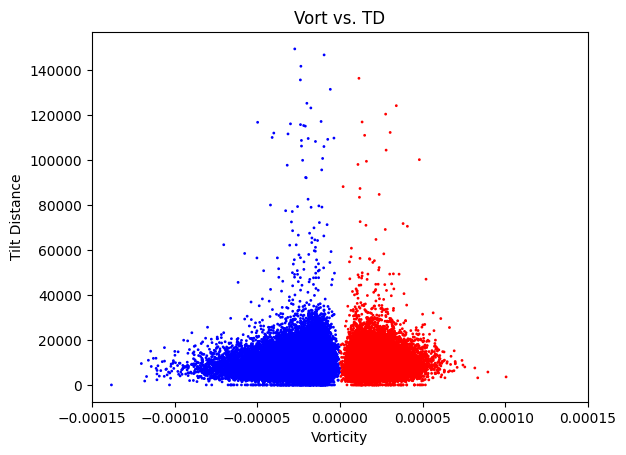

In [4]:
colors = np.where(np.array(evort) > 0, 'red', 'blue')
plt.scatter(evort, tdis, c=colors, s=1)
plt.xlabel('Vorticity')
plt.ylabel('Tilt Distance')
plt.title('Vort vs. TD')
plt.xlim(-0.00015, 0.00015)
plt.show()

## Wind Rose Diagrams

/home/z5297792/.local/lib/python3.10/site-packages/numpy/lib/_function_base_impl.py:1452: RuntimeWarning: invalid value encountered in subtract
  a = op(a[slice1], a[slice2])


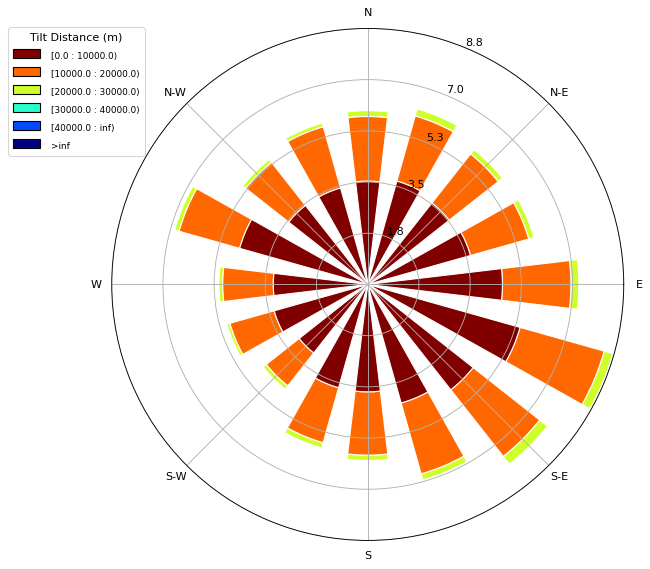

In [5]:
from windrose import WindroseAxes
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import numpy as np


ws = np.array(tdis)
wd = np.array(tdir)

# Define custom bins
bins = [0, 10000, 20000, 30000, 40000, np.inf]


# Create the Windrose plot
ax = WindroseAxes.from_ax()
ax.bar(wd, ws, normed=True, bins=bins, opening=0.6, edgecolor='white', cmap=cm.jet_r)
ax.set_legend(title='Tilt Distance (m)', fontsize='large', loc='upper left', bbox_to_anchor=(-0.2, 1))
ax.grid(True)
plt.show()

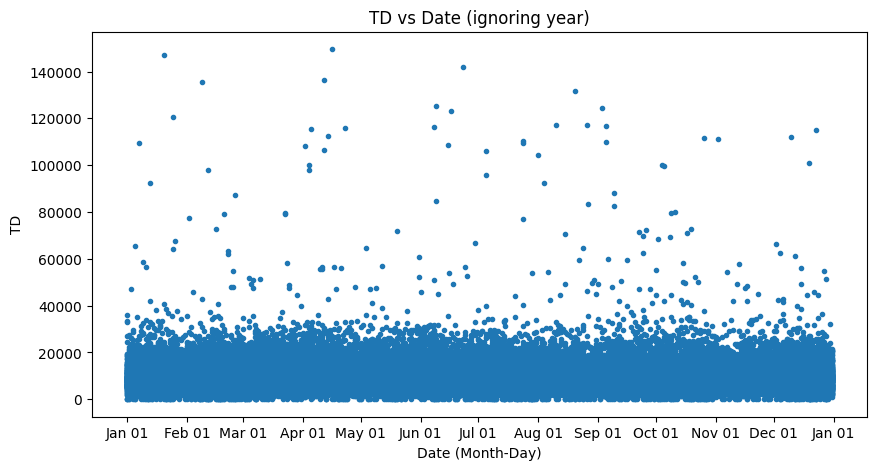

In [6]:
import datetime
# for i in range(len(tdir)):
#     plt.plot(evort[i],tdis[i],'.',color=distinct_colors_for_each_season[seasons[i]])
# plt.ylim([0,100000])

# Extract month and day, ignoring the year
date_wo_year = [datetime.datetime(2000, d.month, d.day) for d in date]  # Use 2000 as a placeholder year

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(date_wo_year, tdis, '.')
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%b %d'))  # Format x-axis as Month Day
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.MonthLocator())  # Major ticks at each month
plt.xlabel('Date (Month-Day)')
plt.ylabel('TD')
plt.title('TD vs Date (ignoring year)')
# plt.ylim([0,100000])
plt.show()

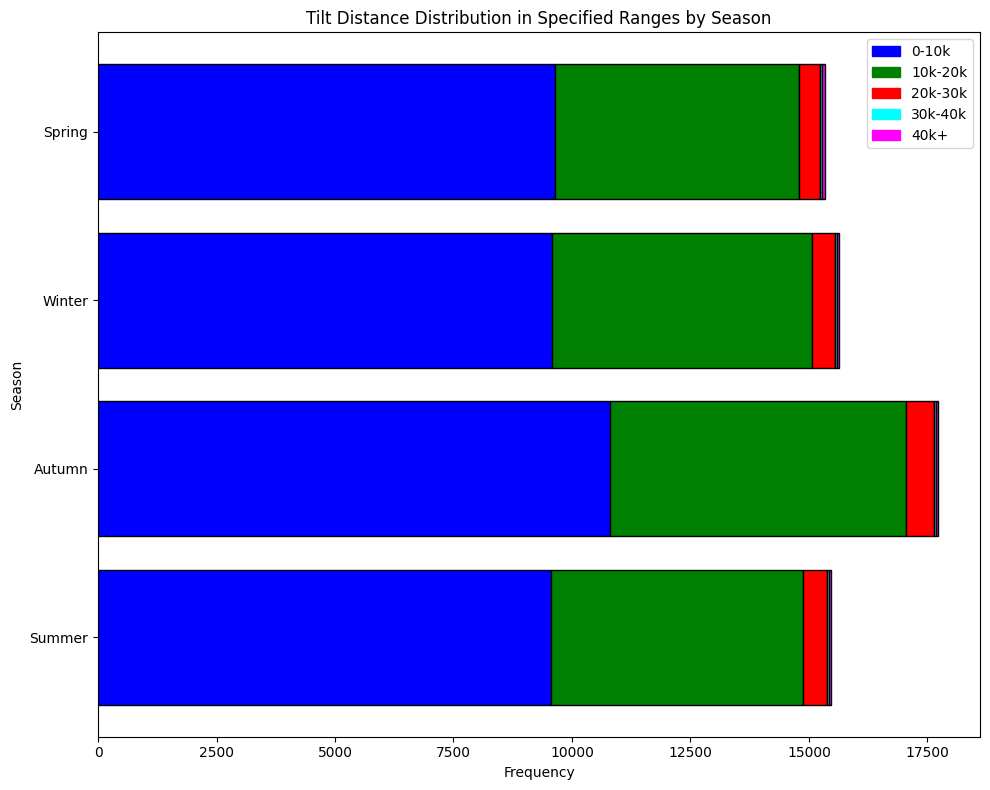

In [7]:
# Define bins
bins = [0, 10000, 20000, 30000, 40000, np.inf]

# Colors and labels for the bins
colors = ['blue', 'green', 'red', 'cyan', 'magenta']
labels = ['0-10k', '10k-20k', '20k-30k', '30k-40k', '40k+']

# Plotting
plt.figure(figsize=(10, 8))

# Seasons in order
seasons_order = ['Summer', 'Autumn', 'Winter', 'Spring']

for idx, season in enumerate(seasons_order):
    tdis_season = np.array(tdis)[np.array(seasons) == season]

    # Calculate the histogram
    hist, bin_edges = np.histogram(tdis_season, bins=bins)
    
    # Start position for each segment
    start_positions = np.cumsum([0] + hist[:-1].tolist())
    
    # Plot each segment
    for i in range(len(hist)):
        plt.barh(idx, hist[i], left=start_positions[i], color=colors[i], edgecolor='black')

# Adding titles and labels
plt.title('Tilt Distance Distribution in Specified Ranges by Season')
plt.xlabel('Frequency')
plt.ylabel('Season')
plt.yticks(range(len(seasons_order)), seasons_order)

# Add legend
handles = [plt.Rectangle((0,0),1,1, color=color) for color in colors]
plt.legend(handles, labels)

# Display the plot
plt.tight_layout()
plt.show()



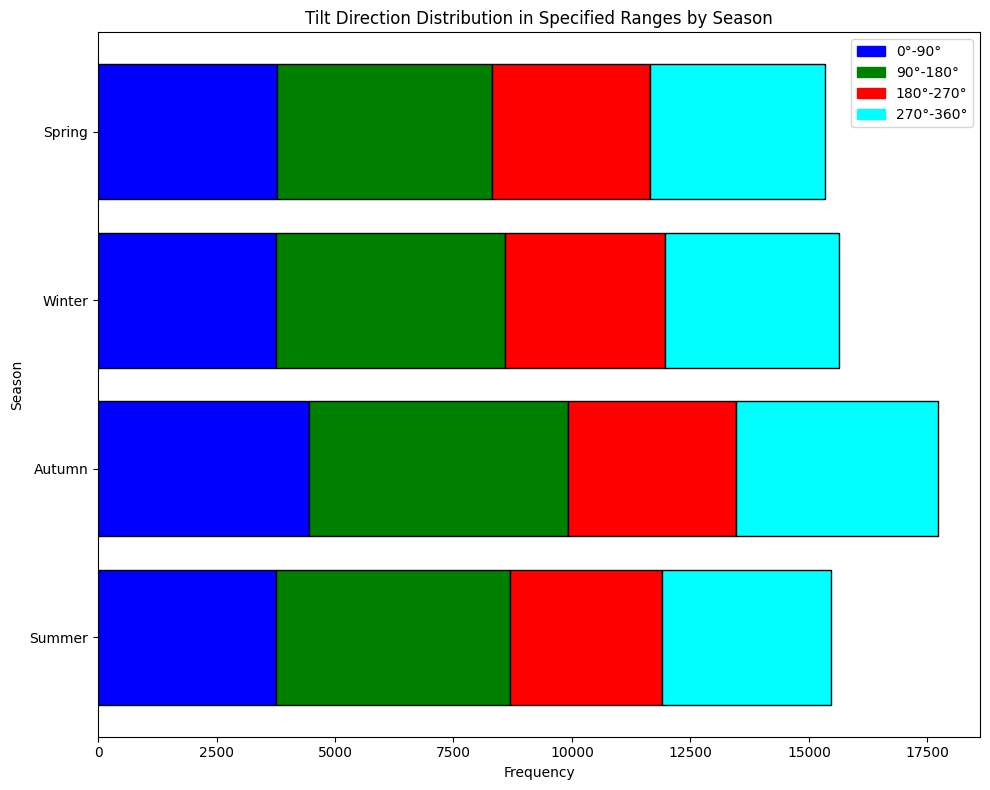

In [8]:
# Define bins
bins = [0, 90, 180, 270, 360]

# Colors and labels for the bins
colors = ['blue', 'green', 'red', 'cyan']
labels = ['0°-90°', '90°-180°', '180°-270°', '270°-360°']

# Plotting
plt.figure(figsize=(10, 8))

# Seasons in order
seasons_order = ['Summer', 'Autumn', 'Winter', 'Spring']

for idx, season in enumerate(seasons_order):
    tdir_season = np.array(tdir)[np.array(seasons) == season]

    # Calculate the histogram
    hist, bin_edges = np.histogram(tdir_season, bins=bins)
    
    # Start position for each segment
    start_positions = np.cumsum([0] + hist[:-1].tolist())
    
    # Plot each segment
    for i in range(len(hist)):
        plt.barh(idx, hist[i], left=start_positions[i], color=colors[i], edgecolor='black')

# Adding titles and labels
plt.title('Tilt Direction Distribution in Specified Ranges by Season')
plt.xlabel('Frequency')
plt.ylabel('Season')
plt.yticks(range(len(seasons_order)), seasons_order)

# Add legend
handles = [plt.Rectangle((0,0),1,1, color=color) for color in colors]
plt.legend(handles, labels)

# Display the plot
plt.tight_layout()
plt.show()

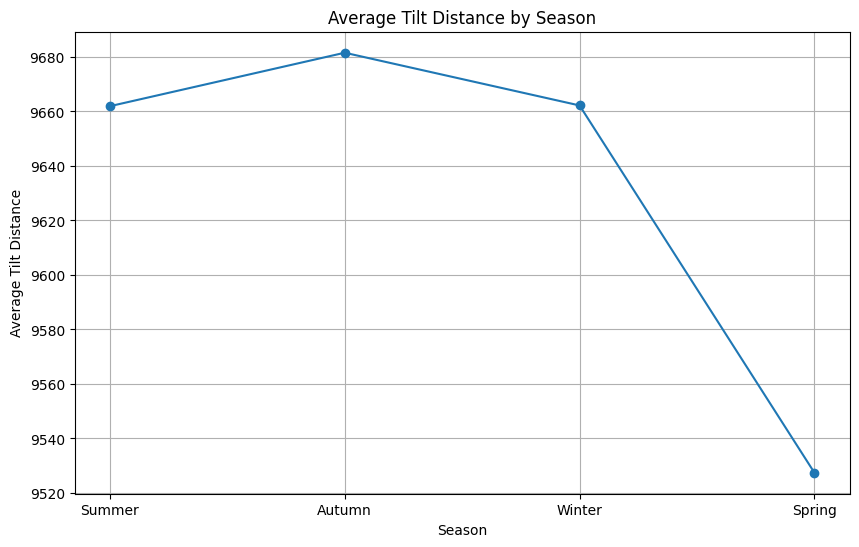

In [9]:
import pandas as pd

# Create a DataFrame
data = {'dates': date, 'y_values': tdis}
df = pd.DataFrame(data)

# Extract month names
df['month'] = df['dates'].dt.strftime('%b')

# Map months to seasons
df['season'] = df['month'].apply(month_to_season)

# Calculate the average y-value for each season
avg_y_per_season = df.groupby('season')['y_values'].mean()

# Define the correct order for seasons
seasons_order = ['Summer', 'Autumn', 'Winter', 'Spring']
avg_y_per_season = avg_y_per_season.reindex(seasons_order)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(avg_y_per_season, marker='o')
plt.xlabel('Season')
plt.ylabel('Average Tilt Distance')
plt.title('Average Tilt Distance by Season')
plt.grid(True)
plt.show()

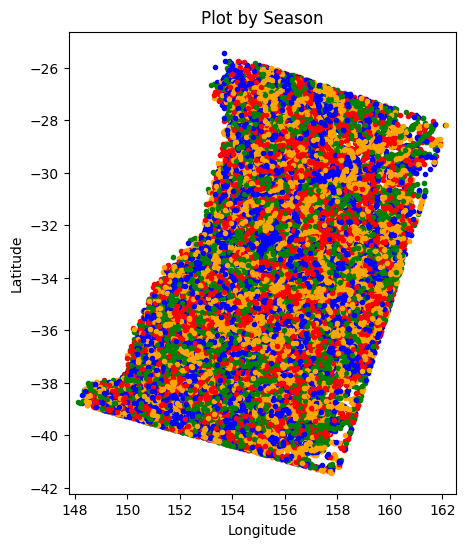

In [10]:
plt.figure(figsize=(5, 6))

for i in range(len(evort)):
    season = seasons[i]
    plt.plot(elon[i], elat[i], '.', color=distinct_colors_for_each_season[season])

# Adding titles and labels
plt.title('Plot by Season')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.axis('equal')
plt.show()


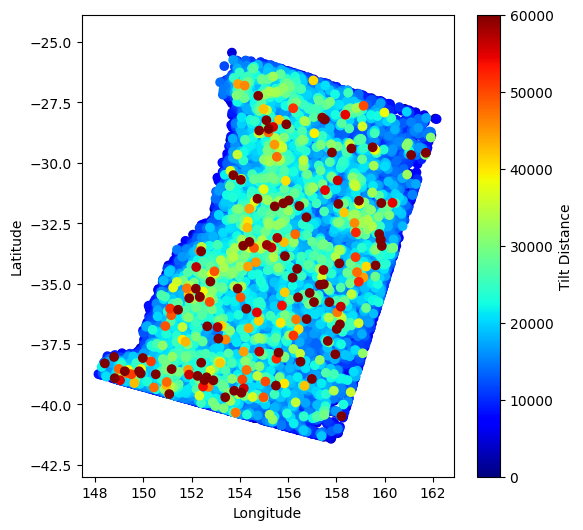

In [11]:
# Normalize tdis for colormap
norm = plt.Normalize(0, 60000)

# Choose a colormap
cmap = plt.get_cmap('jet')

plt.figure(figsize=(6, 6))

# Create scatter plot
sc = plt.scatter(elon, elat, c=tdis, cmap=cmap, norm=norm)

plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Add colorbar
plt.colorbar(sc, label='Tilt Distance')
plt.axis('equal')
plt.show()

In [12]:
import matplotlib.patheffects as path_effects

def plot_tilt_overview(eddys):

    def destination_point(lon, lat, distance, bearing):
        R = 6371000
        bearing = math.radians(bearing)
        lat1 = math.radians(lat)
        lon1 = math.radians(lon)
        lat2 = math.asin(math.sin(lat1) * math.cos(distance / R) +
                        math.cos(lat1) * math.sin(distance / R) * math.cos(bearing))
        lon2 = lon1 + math.atan2(math.sin(bearing) * math.sin(distance / R) * math.cos(lat1),
                                math.cos(distance / R) - math.sin(lat1) * math.sin(lat2))
        lat2 = math.degrees(lat2)
        lon2 = math.degrees(lon2)
        return lon2, lat2

    plt.figure(figsize=(20, 20))

    # ax = plt.contourf(lon_rho, lat_rho, h)
    ax = plt.pcolor(lon_rho, lat_rho, h, cmap='gray')
    plt.colorbar(ax)

    categories = 10
    color_map = plt.cm.tab10(np.linspace(0, 1, categories))  # Generate colors for each category

    for idx, eddy in enumerate(eddys):
        color = color_map[idx % categories]
        # flag = 1
        for time in range(1000): #TOTAL_NUM_DAYS

            if 'Day'+str(time+1) in eddies[eddy].index:

                elon = eddies[eddy].loc['Day'+str(time+1)].Lon
                elat = eddies[eddy].loc['Day'+str(time+1)].Lat
                distance = eddies[eddy].loc['Day'+str(time+1)]['Tilt Distance']
                bearing = eddies[eddy].loc['Day'+str(time+1)]['Tilt Bearing']
                bearing = (bearing + 180) % 360 
                lon_btm, lat_btm = destination_point(elon, elat, distance, bearing)
            
                plt.plot([elon, lon_btm], [elat, lat_btm], linewidth=3, color=color)
                plt.scatter(elon, elat, color=color)
        


                # if not np.isnan(elon) and flag:
                #     text = plt.text(elon,elat,round(eddies[eddy].Id[0]),color='w',fontweight='bold')
                #     text.set_path_effects([path_effects.Stroke(linewidth=3, foreground='black'), path_effects.Normal()])
                #     flag = 0




            
    plt.axis('equal')

    # plt.ylim([-40, -26])
    # plt.xlim([150, 161])

    # plt.ylim([-40, -36])
    # plt.xlim([150, 153])


    plt.show()

In [13]:
# Import Data for Plotting
import netCDF4 as nc
import math
fname = '/srv/scratch/z3533156/26year_BRAN2020/outer_avg_01461.nc'
dataset = nc.Dataset(fname)
lon_rho  = dataset.variables['lon_rho']
lon_rho = np.transpose(lon_rho, axes=(1, 0))
lat_rho  = dataset.variables['lat_rho']
lat_rho = np.transpose(lat_rho, axes=(1, 0))
h = dataset.variables['h']
h = np.transpose(h, (1, 0))

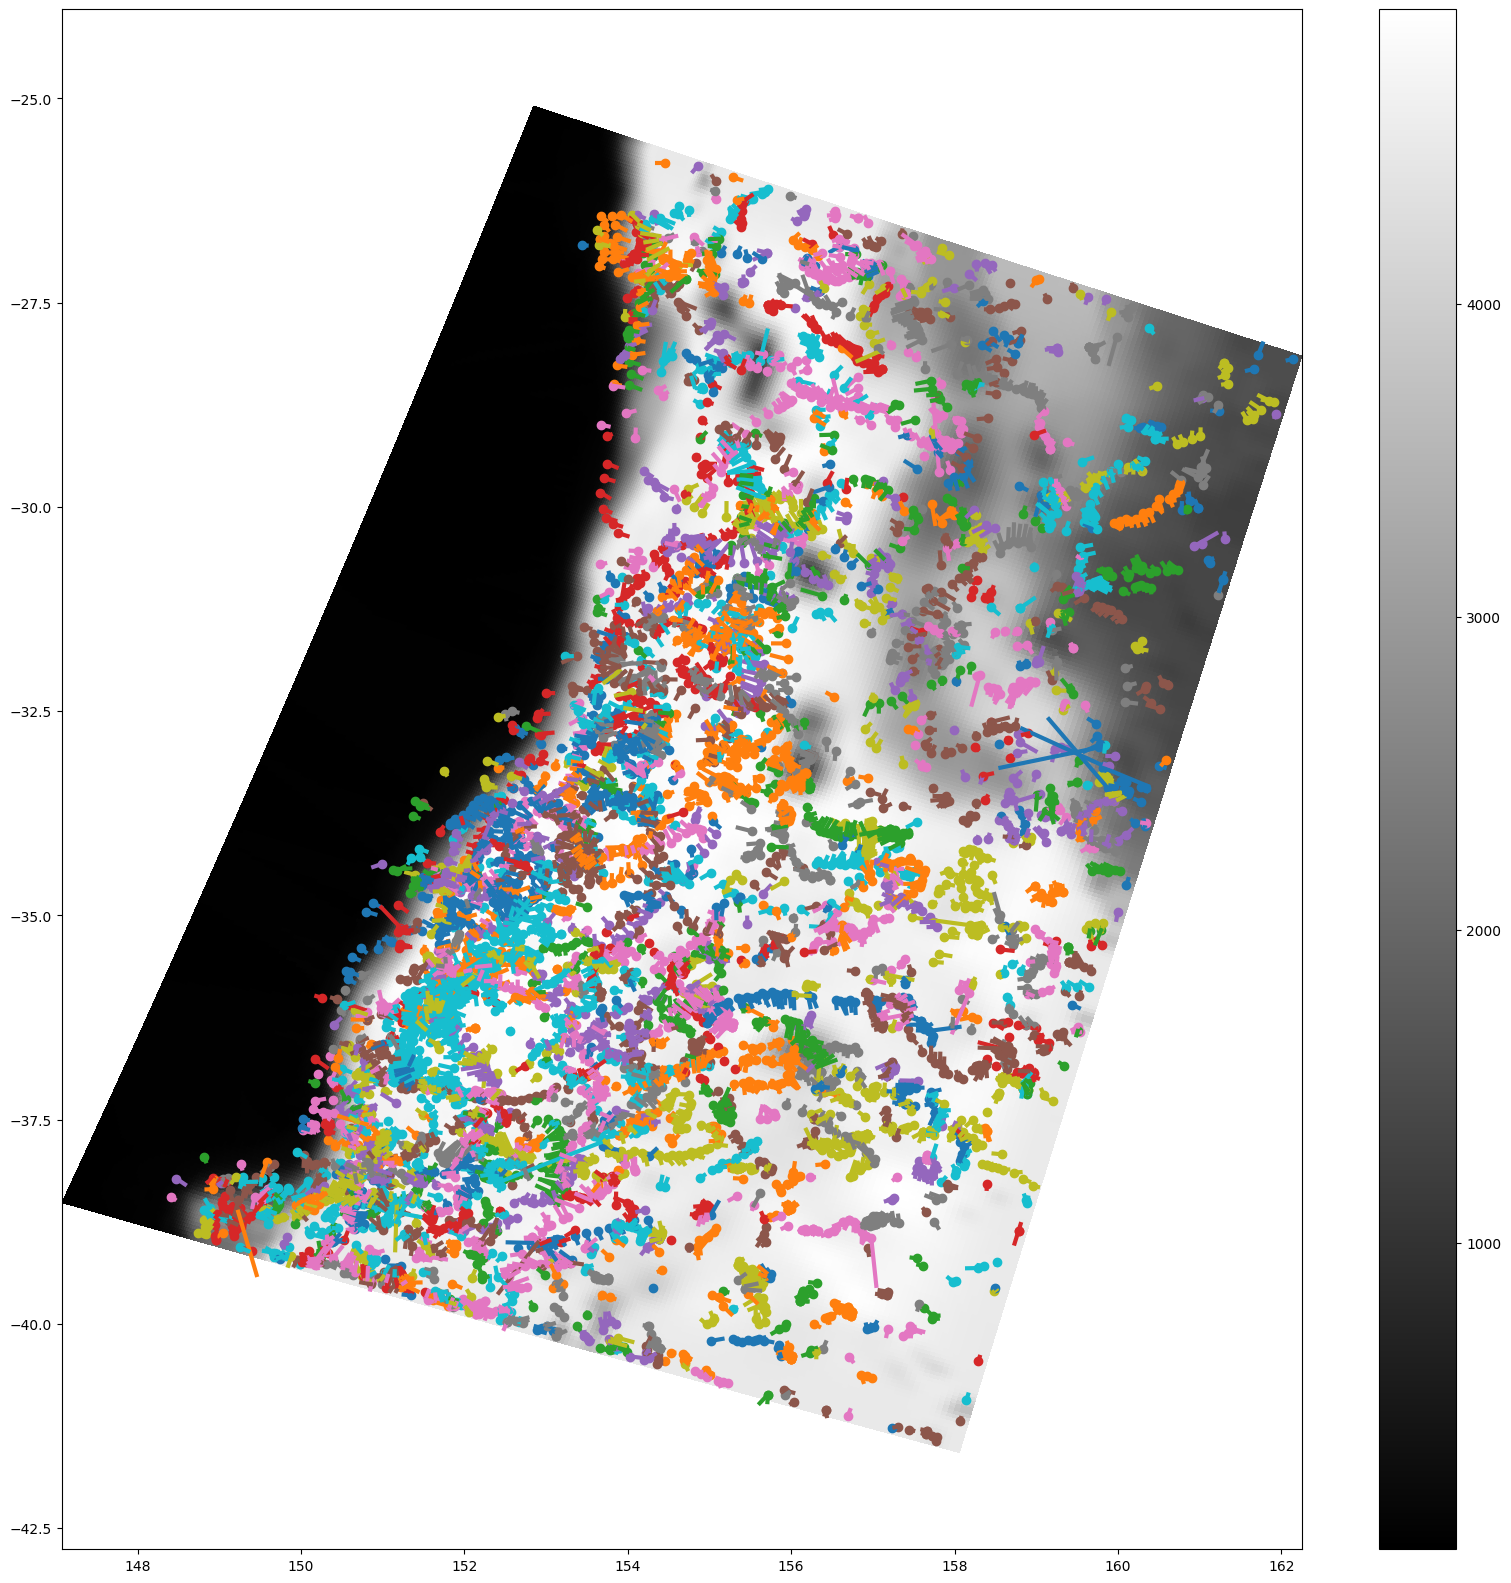

In [14]:
eddys = [f"Eddy{i}" for i in range(1,len(eddies))]

plot_tilt_overview(eddys)

In [15]:
number_of_LTEs = 0 #5yr: 70516 Eddy Days and only 12887 LTEs ~ 20% (0.183%)    26yr: 354,409 Eddy-Days and 66,671 LTEs ~ 20% (0.188%)

for eddy in eddies.keys():
    number_of_LTEs = number_of_LTEs + len(eddies[eddy])

number_of_LTEs

64154

Text(0, 0.5, 'TD (m)')

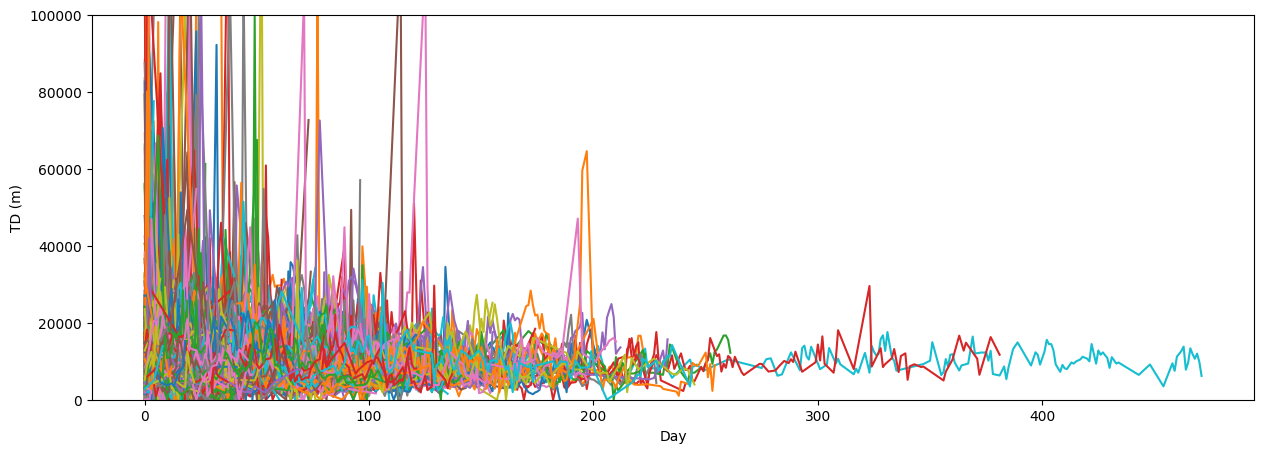

In [18]:
plt.figure(figsize=(15, 5))
for eddy in eddies.keys():
# for eddy in ['Eddy790']:
    if len(eddies[eddy]) > 0:
        day = extract_numbers_from_list(eddies[eddy].index)
        day = np.array(day) - day[0]
        
        TD = eddies[eddy]['Tilt Distance']        
        
        plt.plot(day,TD)

plt.ylim([0,100000])
plt.xlabel('Day')
plt.ylabel('TD (m)')

TypeError: isinstance() arg 2 must be a type, a tuple of types, or a union

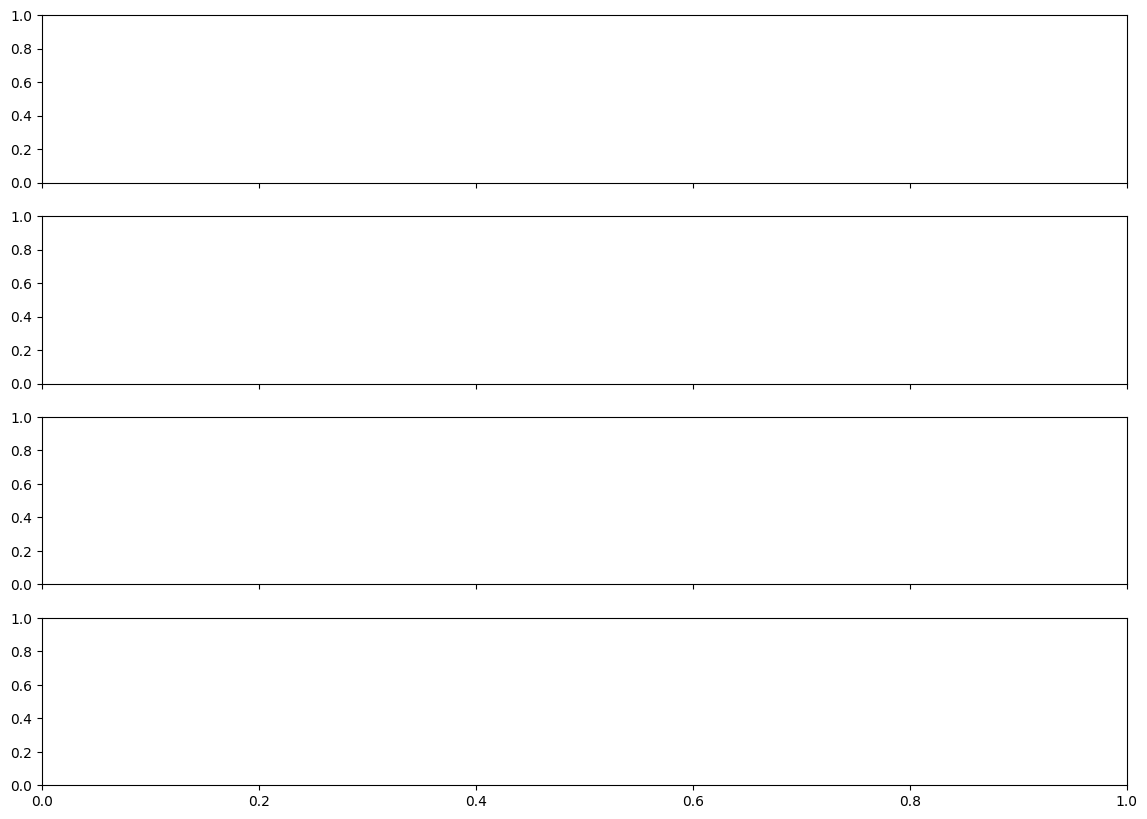

In [17]:
# Create a figure with 4 vertical subplots
fig, axes = plt.subplots(4, 1, figsize=(14, 10), sharex=True)

# Define the order of seasons
season_order = ['Summer', 'Autumn', 'Winter', 'Spring']

for i, season in enumerate(season_order):
    ax = axes[i]

    for eddy in eddies.keys():
    # for eddy in ['Eddy739']:
        if len(eddies[eddy]) > 0:
            # Extract and adjust days
            days = np.array(extract_numbers_from_list(eddies[eddy].index))
            days -= days[0]

            # Compute seasons for each day
            dates = add_days_to_date(extract_numbers_from_list(eddies[eddy].index))
            sns = [date_to_season(d) for d in dates]

            # Filter Tilt Distance within the threshold
            TD = np.array(eddies[eddy]['Tilt Distance'])
            mask = TD <= 150000
            days = days[mask]
            TD = TD[mask]
            sns = np.array(sns)[mask]

            # Plot only the data points that correspond to the current season
            season_mask = (sns == season)
            ax.plot(days[season_mask], TD[season_mask], color=distinct_colors_for_each_season[season])

    # Set titles and labels for each subplot
    ax.set_ylim([0, 100000])
    ax.set_ylabel('Tilt Distance')
    ax.set_title(f'Tilt Distance Over Time - {season}')
    ax.grid(True)

# Set common x-label for all subplots
axes[-1].set_xlabel('Days')

plt.tight_layout()
plt.show()


In [ ]:
# Zonal tilt
plt.figure(figsize=(15, 5))
for eddy in eddies.keys():
# for eddy in ['Eddy790']:
    if len(eddies[eddy]) > 0:
        day = extract_numbers_from_list(eddies[eddy].index)
        day = np.array(day) - day[0]
        TD = eddies[eddy]['Tilt Distance']
        brng = eddies[eddy]['Tilt Bearing']
        TDx = TD*np.sin(brng)

        mask = (TDx <= 100000) & (TDx >= -100000)

        day = day[mask]
        TDx = np.array(TDx)[mask]
        
        
        plt.plot(day,TDx)

plt.ylim([-100000,100000])


# Eddy Avenue

In [2]:
tdir, tdis, elon, elat, evort, date, days = [], [], [], [], [], [], []

for eddy in eddies.keys():

    if len(eddies[eddy]) != 0:

        if any(eddies[eddy]['Vort'] > 0):
  
            tdis.extend(eddies[eddy]['Tilt Distance'])
            tdir.extend(eddies[eddy]['Tilt Bearing'])
            elon.extend(eddies[eddy]['Lon'])
            elat.extend(eddies[eddy]['Lat'])
            evort.extend(eddies[eddy]['Vort'])
    
            days_to_add = extract_numbers_from_list(list(eddies[eddy].index))
    
            date.extend(add_days_to_date(days_to_add)) 
    
            days.extend(days_to_add)

# Combine all lists into a list of tuples
combined = list(zip(tdis, tdir, elon, elat, evort, date, days))

# Sort the combined list by the first element of each tuple, which is tdis
combined_sorted = sorted(combined, key=lambda x: x[0])

# Unzip the sorted list back into individual lists
tdis_sorted, tdir_sorted, elon_sorted, elat_sorted, evort_sorted, date_sorted, days_sorted = zip(*combined_sorted)

# Convert back to lists if needed
tdis = list(tdis_sorted)
tdir = list(tdir_sorted)
elon = list(elon_sorted)
elat = list(elat_sorted)
evort = list(evort_sorted)
date = list(date_sorted)
days = list(days_sorted)

months = [d.strftime("%b") for d in date]
seasons = [month_to_season(m) for m in months]


NameError: name 'extract_numbers_from_list' is not defined

In [3]:
import netCDF4 as nc

fname = '/srv/scratch/z3533156/26year_BRAN2020/outer_avg_01461.nc'
dataset = nc.Dataset(fname)
lon_rho  = dataset.variables['lon_rho']
lon_rho = np.transpose(lon_rho, axes=(1, 0))
lat_rho  = dataset.variables['lat_rho']
lat_rho = np.transpose(lat_rho, axes=(1, 0))
h = dataset.variables['h']
h = np.transpose(h, (1, 0))


right_i = 100
up_j = 150

ow = np.load('/srv/scratch/z5297792/Climatology/ow_and_cur_speeds/ow_01461.npy')
plt.pcolor(lon_rho,lat_rho,ow[:,:,0,0],vmin=-1E-9,vmax=1E-9)
plt.scatter(lon_rho[right_i,:up_j],lat_rho[right_i,:up_j])
plt.scatter(lon_rho[:right_i,up_j],lat_rho[:right_i,up_j])
top_bdry_lon = lon_rho[:right_i,up_j]
top_bdry_lat = lat_rho[:right_i,up_j]
top_bdry = tuple(zip(top_bdry_lon,top_bdry_lat))
btm_bdry_lon = lon_rho[:right_i,0]
btm_bdry_lat = lat_rho[:right_i,0]
btm_bdry = tuple(zip(btm_bdry_lon,btm_bdry_lat))
right_bdry_lon = lon_rho[right_i,:up_j]
right_bdry_lat = lat_rho[right_i,:up_j]
right_bdry = tuple(zip(right_bdry_lon,right_bdry_lat))
left_bdry_lon = lon_rho[0,:up_j]
left_bdry_lat = lat_rho[0,:up_j]
left_bdry = tuple(zip(left_bdry_lon,left_bdry_lat))

from shapely.geometry import Point, Polygon


# Define the transects (example coordinates)
transect_1 = top_bdry
transect_2 = btm_bdry
transect_3 = right_bdry
transect_4 = left_bdry

# Combine the transects to form a polygon
polygon_points = transect_1 + transect_2 + transect_3 + transect_4
polygon = Polygon(polygon_points)

# Define the series of points to check
points = list(zip(elon,elat))

# Find points inside the polygon
enclosed_points = [point for point in points if polygon.contains(Point(point))]

enclosed_points_indices = [polygon.contains(Point(point)) for point in points]

ave_tdir = np.array(tdir)[enclosed_points_indices]
ave_tdis = np.array(tdis)[enclosed_points_indices]
ave_elon = np.array(elon)[enclosed_points_indices]
ave_elat = np.array(elat)[enclosed_points_indices]
ave_evort = np.array(evort)[enclosed_points_indices]
ave_date = np.array(date)[enclosed_points_indices]
ave_days = np.array(days)[enclosed_points_indices]
ave_months = np.array(months)[enclosed_points_indices]
ave_seasons = np.array(seasons)[enclosed_points_indices]

# Separate the x and y coordinates for plotting
x_coords = [point[0] for point in enclosed_points]
y_coords = [point[1] for point in enclosed_points]

# Plot the enclosed points
plt.plot(x_coords, y_coords,'.')

NameError: name 'plt' is not defined

In [ ]:
import pandas as pd

# Create a DataFrame
data = {'dates': ave_date, 'y_values': ave_tdis}
df = pd.DataFrame(data)

# Extract month names
df['month'] = df['dates'].dt.strftime('%b')

# Map months to seasons
df['season'] = df['month'].apply(month_to_season)

# Calculate the average y-value for each season
avg_y_per_season = df.groupby('season')['y_values'].mean()

# Define the correct order for seasons
seasons_order = ['Summer', 'Autumn', 'Winter', 'Spring']
avg_y_per_season = avg_y_per_season.reindex(seasons_order)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(avg_y_per_season, marker='o')
plt.xlabel('Season')
plt.ylabel('Average Tilt Distance')
plt.title('Average Tilt Distance by Season in Eddy Avenue')
plt.grid(True)
plt.show()

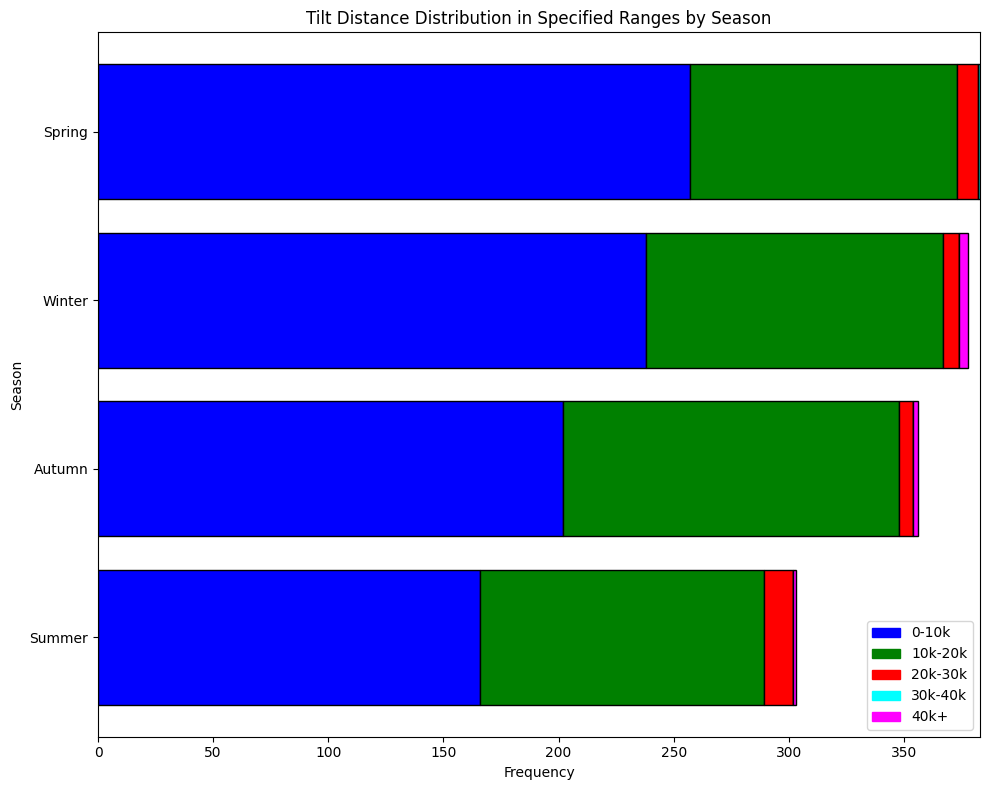

In [13]:
# Define bins
bins = [0, 10000, 20000, 30000, 40000, np.inf]

# Colors and labels for the bins
colors = ['blue', 'green', 'red', 'cyan', 'magenta']
labels = ['0-10k', '10k-20k', '20k-30k', '30k-40k', '40k+']

# Plotting
plt.figure(figsize=(10, 8))

# Seasons in order
seasons_order = ['Summer', 'Autumn', 'Winter', 'Spring']

for idx, season in enumerate(seasons_order):
    tdis_season = np.array(ave_tdis)[np.array(ave_seasons) == season]

    # Calculate the histogram
    hist, bin_edges = np.histogram(tdis_season, bins=bins)
    
    # Start position for each segment
    start_positions = np.cumsum([0] + hist[:-1].tolist())
    
    # Plot each segment
    for i in range(len(hist)):
        plt.barh(idx, hist[i], left=start_positions[i], color=colors[i], edgecolor='black')

# Adding titles and labels
plt.title('Tilt Distance Distribution in Specified Ranges by Season in Eddy Avenue')
plt.xlabel('Frequency')
plt.ylabel('Season')
plt.yticks(range(len(seasons_order)), seasons_order)

# Add legend
handles = [plt.Rectangle((0,0),1,1, color=color) for color in colors]
plt.legend(handles, labels)

# Display the plot
plt.tight_layout()
plt.show()

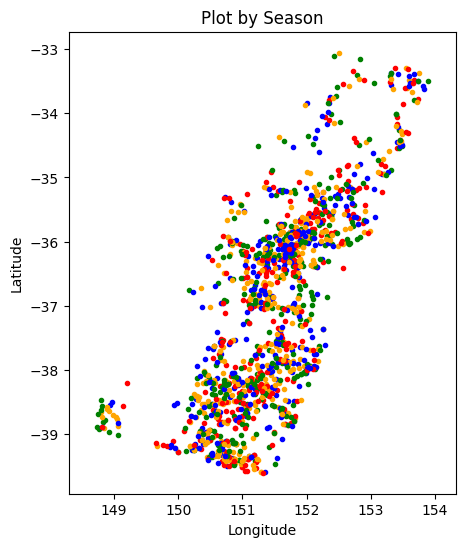

In [14]:
plt.figure(figsize=(5, 6))

for i in range(len(ave_evort)):
    season = seasons[i]
    plt.plot(ave_elon[i], ave_elat[i], '.', color=distinct_colors_for_each_season[season])

# Adding titles and labels
plt.title('Plot by Season')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.axis('equal')
plt.show()

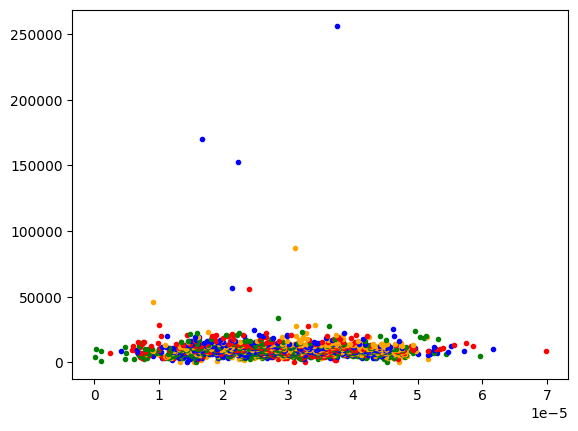

In [37]:
for i in range(len(ave_tdir)):
    plt.plot(ave_evort[i],ave_tdis[i],'.',color=distinct_colors_for_each_season[ave_seasons[i]])
# plt.ylim([0,100000])